# Boston Housing Price Prediction - Linear Regression using Deep Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('1_boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [15]:
# define independent and target variables
X = df.loc[:, df.columns != 'MEDV']
Y = df.loc[:, df.columns == 'MEDV']

# split train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(f"{x_train.shape} {y_train.shape} {x_test.shape} {y_test.shape}")
x_train.shape

(354, 13) (354, 1) (152, 13) (152, 1)


(354, 13)

In [16]:
# transform / normalize data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(x_train[:5])

[[-0.41425879 -0.50512499 -1.29214218 -0.28154625 -0.85108479  0.14526384
  -0.365584    1.08162833 -0.74617905 -1.11279004  0.18727079  0.39651419
  -1.01531611]
 [-0.40200818 -0.50512499 -0.16208345 -0.28154625 -0.08796708 -0.20840082
   0.13394078 -0.48787608 -0.39846419  0.15008778 -0.21208981  0.3870674
  -0.05366252]
 [-0.39721053 -0.50512499 -0.60948856 -0.28154625 -0.93682836 -0.89623682
  -1.26690045  0.62859591 -0.74617905 -1.0466393  -0.16771641  0.42854113
  -0.31132373]
 [-0.29093623 -0.50512499 -0.43196976 -0.28154625 -0.16513629 -0.54396454
  -1.42978896  0.3451327  -0.6302741  -0.60162521  1.20785901  0.31276028
  -0.82242219]
 [ 1.45781561 -0.50512499  1.00549958 -0.28154625  0.19498668 -0.55649596
   0.07964461 -0.40389221  1.68782492  1.5572945   0.8528718   0.10412434
   0.8038002 ]]


In [17]:
# create model and add layers to model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

C:\Users\ASHWIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=2, validation_split=0.1)

Epoch 1/100
20/20 - 1s - 55ms/step - loss: 577.0522 - mae: 22.1578 - val_loss: 522.5591 - val_mae: 21.2160
Epoch 2/100
20/20 - 0s - 7ms/step - loss: 506.8184 - mae: 20.5193 - val_loss: 441.2133 - val_mae: 19.2652
Epoch 3/100
20/20 - 0s - 8ms/step - loss: 404.6811 - mae: 17.9264 - val_loss: 323.4724 - val_mae: 16.0891
Epoch 4/100
20/20 - 0s - 7ms/step - loss: 270.2527 - mae: 13.9827 - val_loss: 190.9402 - val_mae: 11.6133
Epoch 5/100
20/20 - 0s - 8ms/step - loss: 151.6188 - mae: 9.7066 - val_loss: 98.9137 - val_mae: 7.2522
Epoch 6/100
20/20 - 0s - 7ms/step - loss: 90.6150 - mae: 7.2945 - val_loss: 61.0853 - val_mae: 5.3133
Epoch 7/100
20/20 - 0s - 7ms/step - loss: 61.1672 - mae: 6.0186 - val_loss: 45.1113 - val_mae: 4.2828
Epoch 8/100
20/20 - 0s - 7ms/step - loss: 42.1782 - mae: 4.9375 - val_loss: 38.9625 - val_mae: 3.6952
Epoch 9/100
20/20 - 0s - 7ms/step - loss: 33.3981 - mae: 4.3521 - val_loss: 36.6291 - val_mae: 3.7720
Epoch 10/100
20/20 - 0s - 7ms/step - loss: 27.9442 - mae: 3.9935

In [24]:
# evaluate model
loss, mae = model.evaluate(x_test, y_test, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.7440 - mae: 2.1655 


In [25]:
y_pred = model.predict(x_test)
y_pred

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[25.891682 ],
       [35.14415  ],
       [15.38632  ],
       [25.513504 ],
       [15.888091 ],
       [19.559303 ],
       [16.08518  ],
       [15.032923 ],
       [25.145168 ],
       [18.041866 ],
       [21.334194 ],
       [17.48721  ],
       [ 1.9686747],
       [18.363003 ],
       [18.122189 ],
       [22.849434 ],
       [20.210606 ],
       [ 9.668075 ],
       [45.821663 ],
       [13.296799 ],
       [25.263208 ],
       [26.152292 ],
       [14.952125 ],
       [23.128204 ],
       [16.477827 ],
       [17.148289 ],
       [20.513489 ],
       [11.427589 ],
       [19.800129 ],
       [16.971952 ],
       [21.741943 ],
       [23.332975 ],
       [17.490139 ],
       [25.540247 ],
       [13.717487 ],
       [15.558923 ],
       [30.728924 ],
       [21.363937 ],
       [19.81836  ],
       [24.956764 ],
       [15.690471 ],
       [28.932495 ],
       [49.20633  ],
       [17.902922 ],
       [25.522057 ],
       [16.938818 ],
       [16.434574 ],
       [26.65

In [26]:
mean_absolute_error(y_test, y_pred)

2.2763893604278564

In [27]:
mean_squared_error(y_test, y_pred)

12.16464900970459

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)

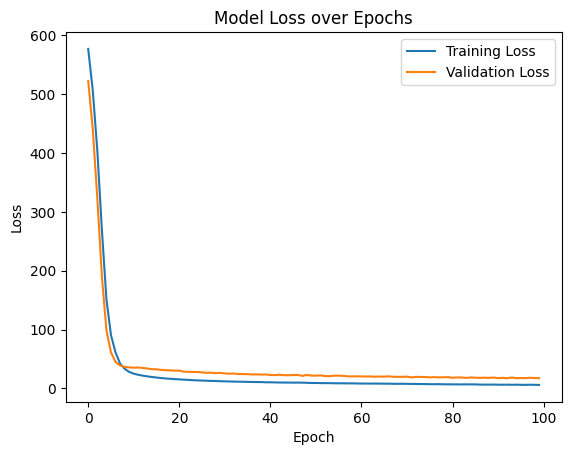

In [29]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

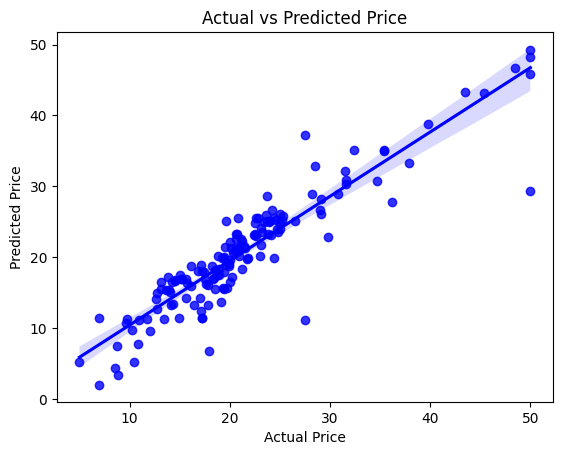

In [41]:
sns.regplot(x=y_test, y=y_pred, color='blue')
plt.title("Actual vs Predicted Price")
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()